# The Greeks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

For a binary European put option which pays \$1 if $S_T < K$ and nothing else draw on three separate figures

In [2]:
# Parameters

K = 100        # Strike price
T = 1.0        # Time to maturity (in years)
t = 0.5        # Current time (i.e., t < T)
r = 0.05       # Risk-free rate
sigma = 0.2    # Volatility

# Time to maturity from current time
tau = T - t

a) the pay-off function of the option as a function of $S_T$

In [3]:
def binary_payoff(option_type):

    S_T = np.linspace(0, 200, 1000)  # Stock price range at maturity

    if option_type == 'Call':
        payoff = np.where(S_T > K, 1, 0)
    else:
        payoff = np.where(S_T < K, 1, 0)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(S_T, payoff, 'r-', lw=2, label=f'Binary {option_type} Payoff')
    plt.axvline(x=K, color='k', linestyle='--', alpha=0.5, label='Strike Price (K)')
    plt.xlabel('Stock Price at Maturity ($S_T$)', fontsize=12)
    plt.ylabel('Payoff', fontsize=12)
    plt.title(f'Binary European {option_type} Option Payoff', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.xlim(0, 200)
    plt.ylim(-0.1, 1.4)
    plt.show()

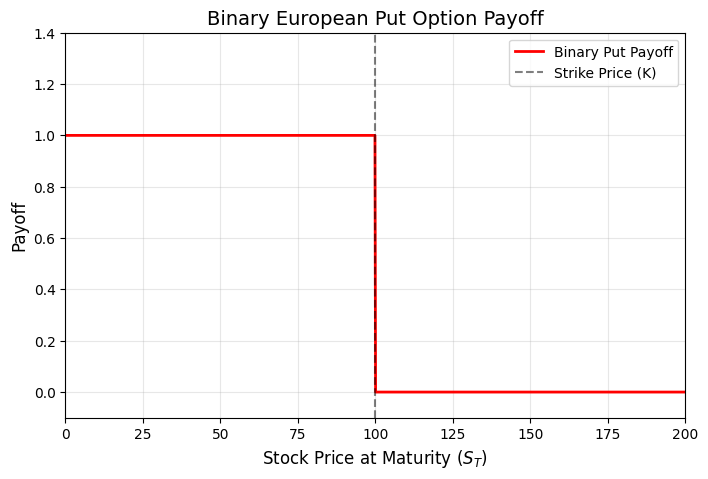

In [4]:
binary_payoff('Put')

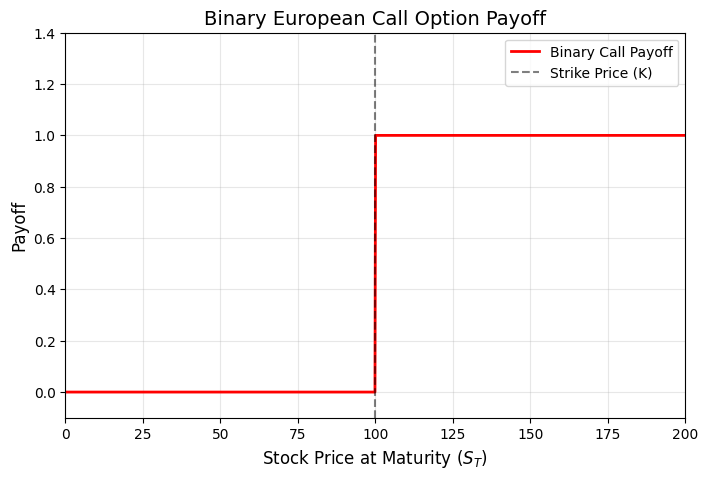

In [5]:
binary_payoff('Call')

Binary call payoff as a function of $S_T$

The graph of the delta of the option as a function of current stock price $S_t$ for some arbitrary $t > 0$ less than $T$.

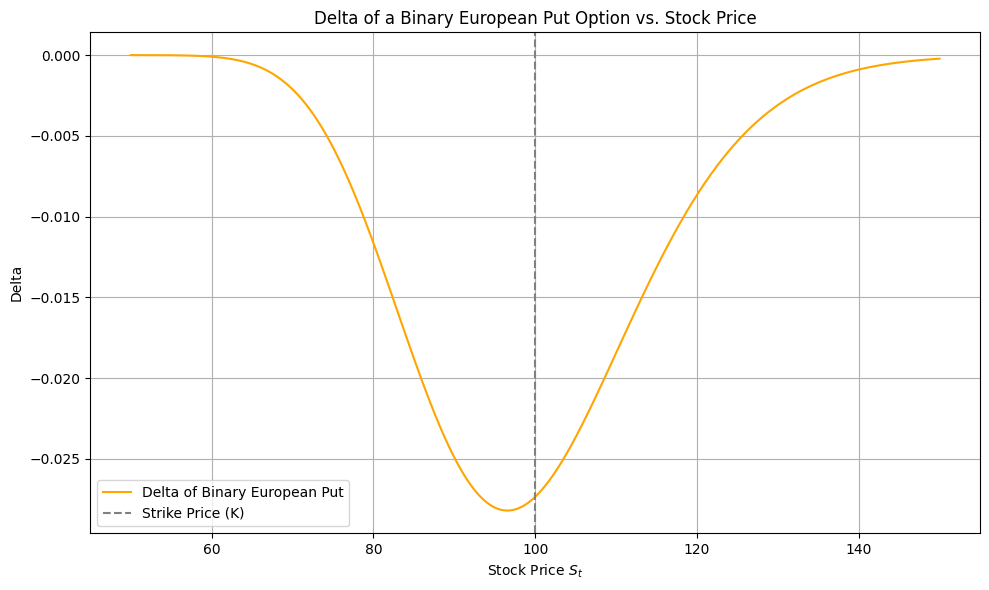

In [6]:
# Stock price range
S = np.linspace(50, 150, 1000)

# Compute d_
d_ = (np.log(S / K) + (r - 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))

# Compute delta of the binary put
delta = -np.exp(-r * tau) * norm.pdf(d_) / (S * sigma * np.sqrt(tau))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(S, delta, label='Delta of Binary European Put', color = 'orange')
plt.axvline(K, color='gray', linestyle='--', label='Strike Price (K)')
plt.title('Delta of a Binary European Put Option vs. Stock Price')
plt.xlabel('Stock Price $S_t$')
plt.ylabel('Delta')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

* We can see a sharp negative spike around the strike price $K = \$100$
* Away from the strike, delta quickly approaches zero.
* This reflects how the option’s sensitivity to changes in $S_t$ is high only near the strike, where the probability of finishing in-the-money is most sensitive to the stock price.
* Since the payoff of the binary put option is a step function at $S_T=K$, the option's value is very sensitive to small changes in $S_t$ near the strike — because that’s where the final payout flips from 1 to 0.
* In the tails, small changes in $S_t$ don't affect the outcome (the option is almost surely in or out of the money), so delta is near zero in the tails.

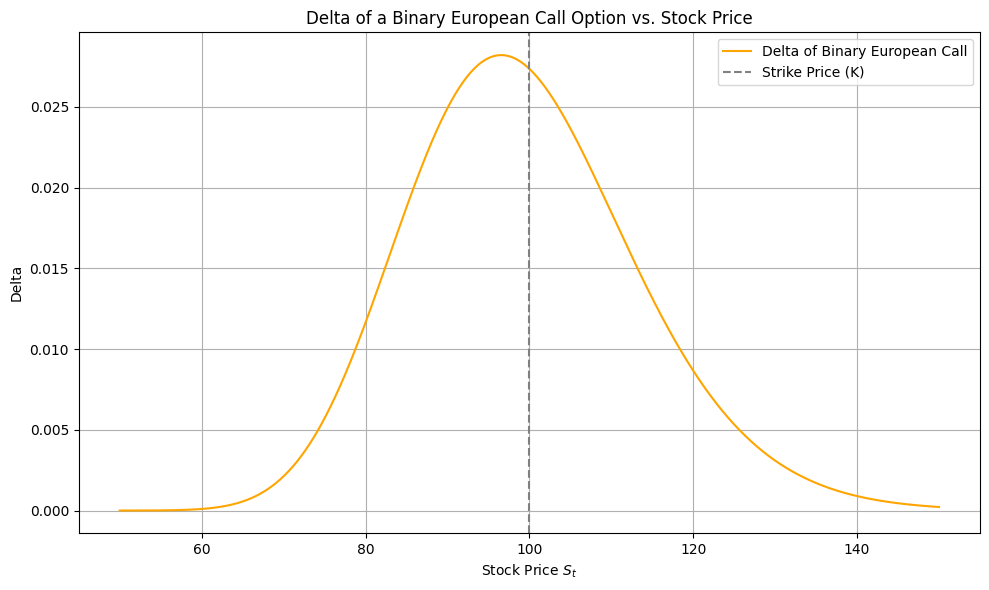

In [7]:
# Stock price range
S = np.linspace(50, 150, 1000)

# Compute d_
d_ = (np.log(S / K) + (r - 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))

# Compute delta of the binary call
delta = np.exp(-r * tau) * norm.pdf(d_) / (S * sigma * np.sqrt(tau))
# Plot
plt.figure(figsize=(10, 6))
plt.plot(S, delta, label='Delta of Binary European Call', color = 'orange')
plt.axvline(K, color='gray', linestyle='--', label='Strike Price (K)')
plt.title('Delta of a Binary European Call Option vs. Stock Price')
plt.xlabel('Stock Price $S_t$')
plt.ylabel('Delta')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The graph of the delta of the option as a function of current stock price $S_{T-\delta t}$ for a small $\delta t > 0$. Explain what happens with the delta of the option when $\delta t \to 0$.

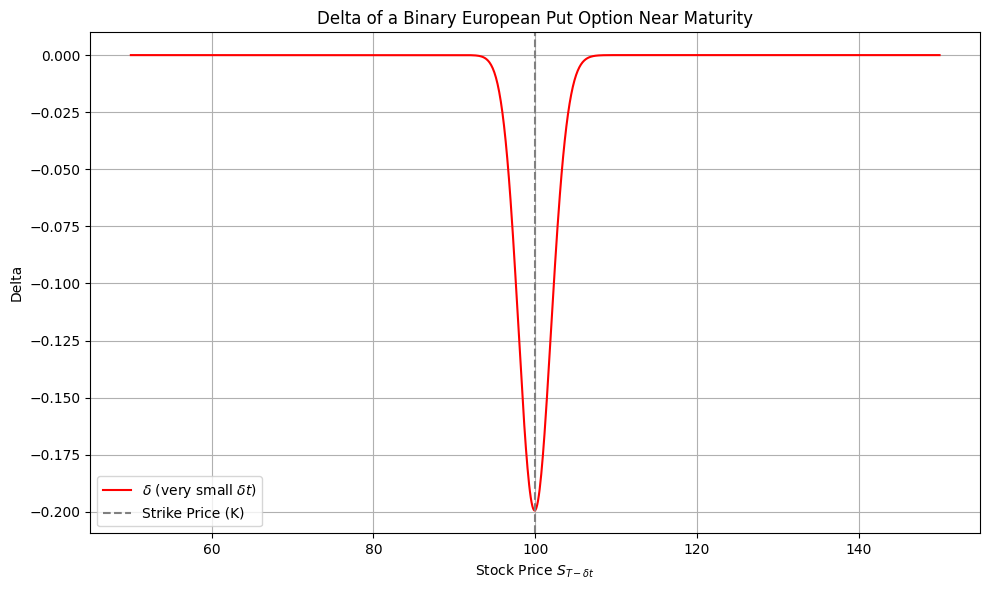

In [12]:
# Parameters
K = 100        # Strike price
r = 0.05       # Risk-free rate
sigma = 0.2    # Volatility
delta_t = 0.01 # Very small time to maturity

# Stock price range
S = np.linspace(50, 150, 1000)

# Compute d2 for small delta_t
d2_small_dt = (np.log(S / K) + (r - 0.5 * sigma ** 2) * delta_t) / (sigma * np.sqrt(delta_t))

# Compute delta of the binary put for small delta_t
delta_small_dt = -np.exp(-r * delta_t) * norm.pdf(d2_small_dt) / (S * sigma * np.sqrt(delta_t))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(S, delta_small_dt, label=r'$\delta$ (very small $\delta t$)', color='red')
plt.axvline(K, color='gray', linestyle='--', label='Strike Price (K)')
plt.title('Delta of a Binary European Put Option Near Maturity')
plt.xlabel('Stock Price $S_{T - \delta t}$')
plt.ylabel('Delta')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

As $\delta t \to 0$ becomes very small, the delta of the binary European put option becomes sharply peaked around the strike price $K$.  This reflects the fact that, near maturity, the option's value becomes extremely sensitive to changes in the stock price near $K$, since a small movement could change the payout from 1 to 0 or vice versa. In the limit as $\delta t \to 0$, the delta becomes a Dirac delta function (a spike with infinite height and zero width), which is the formal derivative of the discontinuous step payoff at maturity.